# Fundamentos de Aprendizaje Automático
## _Práctica 2: K-NN y K-MEANS_
### _Grupo 1461_
#### _Rubén Torralba Manso y Alejandro Monterrubio Navarro_

Importes:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from abc import ABCMeta,abstractmethod
import numpy as np
from Datos import Datos
from Clasificador import *
import EstrategiaParticionado as EstrategiaParticionado
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

ImportError: cannot import name 'datos' from 'Datos' (/mnt/c/Users/alexm/Documents/FAA-1461/Practica_2/Datos.py)

Carga de datasets:

In [ ]:
dataset1 = pd.read_csv('ConjuntosDatosP2/pima-indians-diabetes.csv')
dataset2 = pd.read_csv('ConjuntosDatosP2/wdbc.csv')
dataset3 = pd.read_csv('ConjuntosDatosP2/iris.csv')

## Apartado 1: Algoritmo K-NN

Hacemos que el clasificador sea K-NN y cargo su dataset:

In [10]:
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
errores = []
clasificador = ClasificadorKNN()

Llamamos al entrenamiento de K-NN con "calcularMediaDesviación" y con "normalizarDatos", probamos con todos los dataset:

In [11]:
clasificador.calcularMediaDesviacion(dataset.datos,dataset.nominalAtributos)
clasificador.normalizarDatos(dataset.datos,dataset.nominalAtributos)

    Pregs Plas Pres Skin Test  Mass   Pedi Age Class
0       6  148   72   35    0  33.6  0.627  50     1
1       1   85   66   29    0  26.6  0.351  31     0
2       8  183   64    0    0  23.3  0.672  32     1
3       1   89   66   23   94  28.1  0.167  21     0
4       0  137   40   35  168  43.1  2.288  33     1
..    ...  ...  ...  ...  ...   ...    ...  ..   ...
763    10  101   76   48  180  32.9  0.171  63     0
764     2  122   70   27    0  36.8  0.340  27     0
765     5  121   72   23  112  26.2  0.245  30     0
766     1  126   60    0    0  30.1  0.349  47     1
767     1   93   70   31    0  30.4  0.315  23     0

[768 rows x 9 columns]
        Pregs      Plas      Pres      Skin      Test      Mass      Pedi  \
0   -0.599110  1.901133  0.562975 -0.088497 -0.704754 -0.113147 -0.693714   
1   -0.687147  0.791870  0.457331 -0.194141 -0.704754 -0.236399 -0.698574   
2   -0.563895  2.517390  0.422116 -0.704754 -0.704754 -0.294503 -0.692922   
3   -0.687147  0.862300  0.45733

## Apartado 2: Algoritmo K-Means

## Apartado 3: Scikit-learn y comparación

Vamos a utilizar la libreria de scikit-learn para poder ver como se ejecutan los algotirmos anteriormente vistos y con los resultados obtenidos poder compararlos con nuestros propios algoritmos.

Para esto vamos a utilizar K-NN para los archivos pima-indians-diabetes-csv y wbcd.csv, y K-Means para iris.csv

### K-NN para pima-indians-diabetes:

Primero cargamos los datos en X y el resultado o clase esperada en la Y:

In [ ]:
X = dataset1[['Pregs','Plas','Pres','Skin','Test','Mass','Pedi','Age']].values
y = dataset1[['Class']].values.ravel()

Preparamos el entrenamiento:

In [ ]:
# Se divide en train y set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

Miramos las predicciones y la precisión de estas:

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

acc = knn.score(X_test, y_test)

print('Precisión:', acc)

[0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1
 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0]
Precisión: 0.7402597402597403


Comprobamos la matriz de confusión: 

In [ ]:
print(confusion_matrix(y_test, y_pred))
#Se refiere a:

# |Verdaderos Positivos | Falsos negativos    |
# |Falsos Positivos     | Verdaderos Negativos|

[[75 19]
 [21 39]]


En la matriz, lo ideal es que falsos positivos y negativos sean 0 (aunque un modelo casi nunca será 100% preciso)

Hacemos un reporte de clasificación:

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        94
           1       0.67      0.65      0.66        60

    accuracy                           0.74       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.74      0.74      0.74       154



Ahora creamos un bucle y escogemos el mejor valor para K-NN:

Error Mínimo:  0.2597402597402597 en n_neighbor:  9


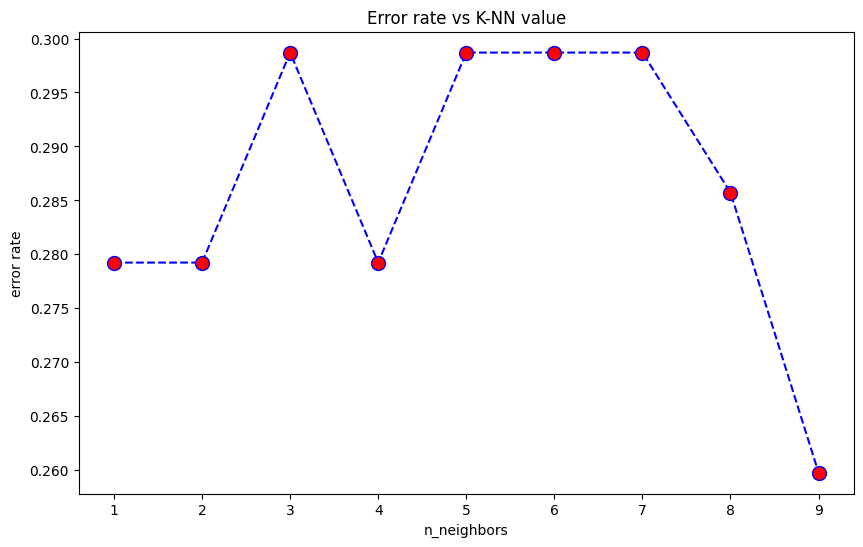

In [ ]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-NN value')
plt.xlabel('n_neighbors')
plt.ylabel('error rate')
print('Error Mínimo: ', min(error_rate), 'en n_neighbor: ', error_rate.index(min(error_rate))+1)
    

El punto más cercano a la zona de abajo será el vecino con el menor índice de error y por tanto el más cercano.

### K-NN para wdbc:

Se repite el mismo proceso de antes:

['B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B']
Precisión: 0.9122807017543859
[[76  4]
 [ 6 28]]
              precision    recall  f1-score   support

           B       0.93      0.95      0.94        80
           M       0.88      0.82      0.85        34

    accuracy                           0.91       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.91      0.91      0.91       114

Error Mínimo:  0.08771929824561403 en n_neighbor:  5


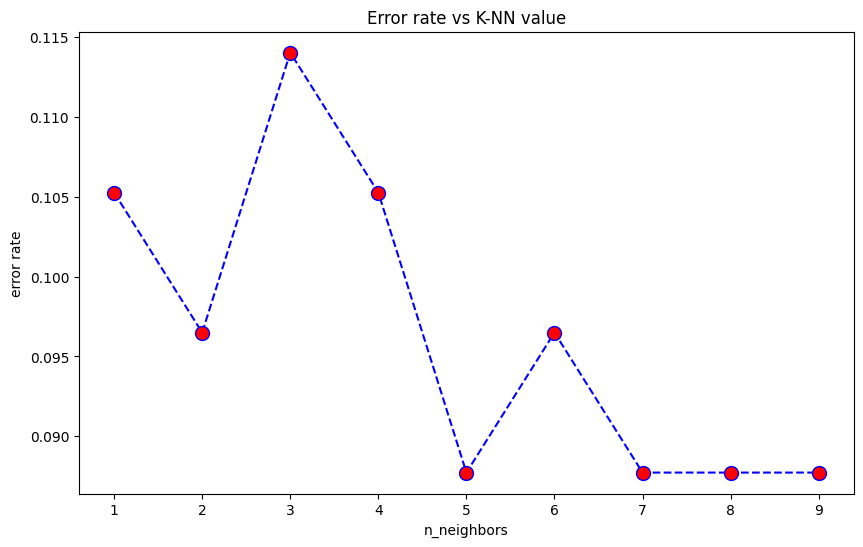

In [ ]:
X = dataset2[['Atributo1','Atributo2','Atributo3','Atributo4','Atributo5','Atributo6','Atributo7','Atributo8','Atributo9','Atributo10','Atributo11','Atributo12','Atributo13','Atributo14','Atributo15'
              ,'Atributo16','Atributo17','Atributo18','Atributo19','Atributo20','Atributo21','Atributo22','Atributo23','Atributo24','Atributo25','Atributo26','Atributo27','Atributo28','Atributo29','Atributo30']].values
y = dataset2[['Class']].values.ravel()

# Se divide en train y set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)

acc = knn.score(X_test, y_test)

print('Precisión:', acc)

print(confusion_matrix(y_test, y_pred))
#Se refiere a:

# | Verdaderos Positivos | Falsos negativos     |
# | Falsos Positivos     | Verdaderos Negativos |

# Ideal es que falsos positivos y negativos sean 0 (aunque un modelo casi nunca será 100% preciso)

print(classification_report(y_test, y_pred))

error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-NN value')
plt.xlabel('n_neighbors')
plt.ylabel('error rate')
print('Error Mínimo: ', min(error_rate), 'en n_neighbor: ', error_rate.index(min(error_rate))+1)

### K-Means para iris:

Empiezo con las características:

In [ ]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   Class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset3.head()

,SL,SW,PL,PW,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Miro los valores descriptivos:

In [ ]:
dataset3.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Normalizamos los valores y los guardo en una nueva variable:

In [ ]:
dataset3_variable = dataset3.drop(['Class'], axis=1)
dataset3_norm = (dataset3_variable-dataset3_variable.min())/(dataset3_variable.max()-dataset3_variable.min())
print(dataset3_norm)

           SL        SW        PL        PW
0    0.222222  0.625000  0.067797  0.041667
1    0.166667  0.416667  0.067797  0.041667
2    0.111111  0.500000  0.050847  0.041667
3    0.083333  0.458333  0.084746  0.041667
4    0.194444  0.666667  0.067797  0.041667
..        ...       ...       ...       ...
145  0.666667  0.416667  0.711864  0.916667
146  0.555556  0.208333  0.677966  0.750000
147  0.611111  0.416667  0.711864  0.791667
148  0.527778  0.583333  0.745763  0.916667
149  0.444444  0.416667  0.694915  0.708333

[150 rows x 4 columns]


Valores descriptivos normalizados:

In [ ]:
dataset3_norm.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Búsqueda de la cantidad óptima de clusters:
(Calculamos que tan parecidos son los individuos dentro de los clusters)

In [ ]:
wcss = [] #Suma de los cuadrados

for i in range(1,5):
    kmeans = KMeans(n_clusters= i, max_iter = 300)
    kmeans.fit(dataset3_norm)
    wcss.append(kmeans.inertia_)

Gráfico de Codo Jambú, el cual utilizamos para saber cual es el número de clusters óptimo, este es el punto en el que deja de disminuir drásticamente:

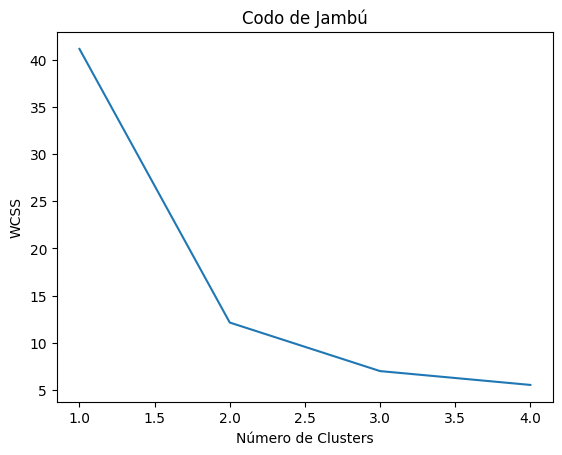

In [ ]:
plt.plot(range(1,5),wcss)
plt.title("Codo de Jambú")
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

### Aplico K-Means a la base de datos

In [ ]:
clustering = KMeans(n_clusters=3, max_iter = 300) #Crea el modelo
clustering.fit(dataset3_norm) #Aplica el modelo a la base de datos

KMeans(n_clusters=3)

Agrego la clasificación al archivo original:

In [ ]:
dataset3['KMeans_Clusters'] = clustering.labels_ #Los resultados del clustering se guardan en labels_ dentro del modelo
print(dataset3)

      SL   SW   PL   PW           Class  KMeans_Clusters
0    5.1  3.5  1.4  0.2     Iris-setosa                1
1    4.9  3.0  1.4  0.2     Iris-setosa                1
2    4.7  3.2  1.3  0.2     Iris-setosa                1
3    4.6  3.1  1.5  0.2     Iris-setosa                1
4    5.0  3.6  1.4  0.2     Iris-setosa                1
..   ...  ...  ...  ...             ...              ...
145  6.7  3.0  5.2  2.3  Iris-virginica                0
146  6.3  2.5  5.0  1.9  Iris-virginica                2
147  6.5  3.0  5.2  2.0  Iris-virginica                0
148  6.2  3.4  5.4  2.3  Iris-virginica                0
149  5.9  3.0  5.1  1.8  Iris-virginica                2

[150 rows x 6 columns]


### Clusters formados:
(Aplicaremos el análisis de componentes principales)

In [ ]:
pca = PCA(n_components=2)
pca_iris = pca.fit_transform(dataset3_norm)
pca_iris_df = pd.DataFrame(data = pca_iris, columns = ['Componente_1','Componente_2'])
pca_ir = pd.concat([pca_iris_df, dataset3[['KMeans_Clusters']]], axis=1)

print(pca_ir)

     Componente_1  Componente_2  KMeans_Clusters
0       -0.630361      0.111556                1
1       -0.623546     -0.100313                1
2       -0.669793     -0.047220                1
3       -0.654633     -0.098791                1
4       -0.648263      0.137558                1
..            ...           ...              ...
145      0.551755      0.058990                0
146      0.406278     -0.172227                2
147      0.447293      0.036996                0
148      0.489218      0.149121                0
149      0.312079     -0.031151                2

[150 rows x 3 columns]


Creo la gráfica:

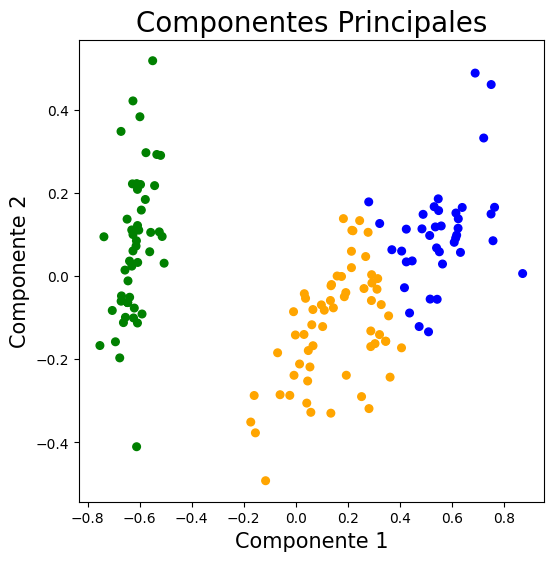

In [ ]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x=pca_ir.Componente_1, y=pca_ir.Componente_2, c=color_theme[pca_ir.KMeans_Clusters], s=30)

plt.show()